## Generating a syntethic data set from Irish language statistics

### Summary, purpose and methodology

In order to investigate a phenomenon with enoguh statistical consistency, the choice has been to adapt real-life information extracted from a reliable source. In this case, Irish Central Statistics Office.

The subject of this investigation is the distribution of Irish speakers through Ireland, which is a matter of importance for cultural, historical and identity reasons, among others.

According to the data published in 2016 Census published by the [Central Statistics Office](https://www.cso.ie/en/releasesandpublications/ep/p-cp10esil/p10esil/ilg/) regarding the use of Irish language, some interesting facts were described, characterising the population by different variables, such as age, sex, geographic place of residence and education level.

Specifically, the information to be used has been colelcted from the thematic statistics contained in [Profile 10 - Education and Skills and the Irish Language](https://www.cso.ie/px/pxeirestat/Database/eirestat/Profile%2010%20-%20Education%20and%20Skills%20and%20the%20Irish%20Language/Profile%2010%20-%20Education%20and%20Skills%20and%20the%20Irish%20Language_statbank.asp?sp=Profile%2010%20-%20Education%20and%20Skills%20and%20the%20Irish%20Language&Planguage=0&ProductID=DB_E10).

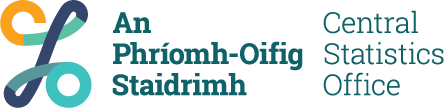

Classification variables will be used to profile the Irish speakers and will be used to generate a synthetised dataset by calculating random values within a list, as per CSO categorisation. 

The first step is to download the facts tables from the official source, where data is available to download in csv format. Unfortunately, war data is not available and therefore, relationships between different variables are difficult to obtain. Instead, bi-dimensional tables need to be downloaded to charaterise the population described in the Census.

Basically we are interested in two type of data: 
- Information regarding general Irish population
- Information regarding Irish-speaking population

Similarly, it is required to obtain classification data, that will be used to characterise aforementioned populations by four dimensions:
- Sex (classified in two categories: male and female)
- Age (classified in five groups)
- Education (classified in eleven levels)
- Geographic location by County and Cities (classified in 31 categories)

These classification is obtained directly from 2016 Census. However, some transformations will be performed when synthetising data.

Once Irish population is characterised according to these four variables, percentages will be calculated in order to assign different weights to the synthetic data set.

It is important to note that variables have been treated as **independent** and, thus, percentages will be individually assigned to each variable.

This implies that further investigation and data manipulation could lead to future development of more complex analysis and synthetic models, including multivariate calculation of mutual influence of variables. However, for the purposes of this investigation, this falls out of the main scope of this project.

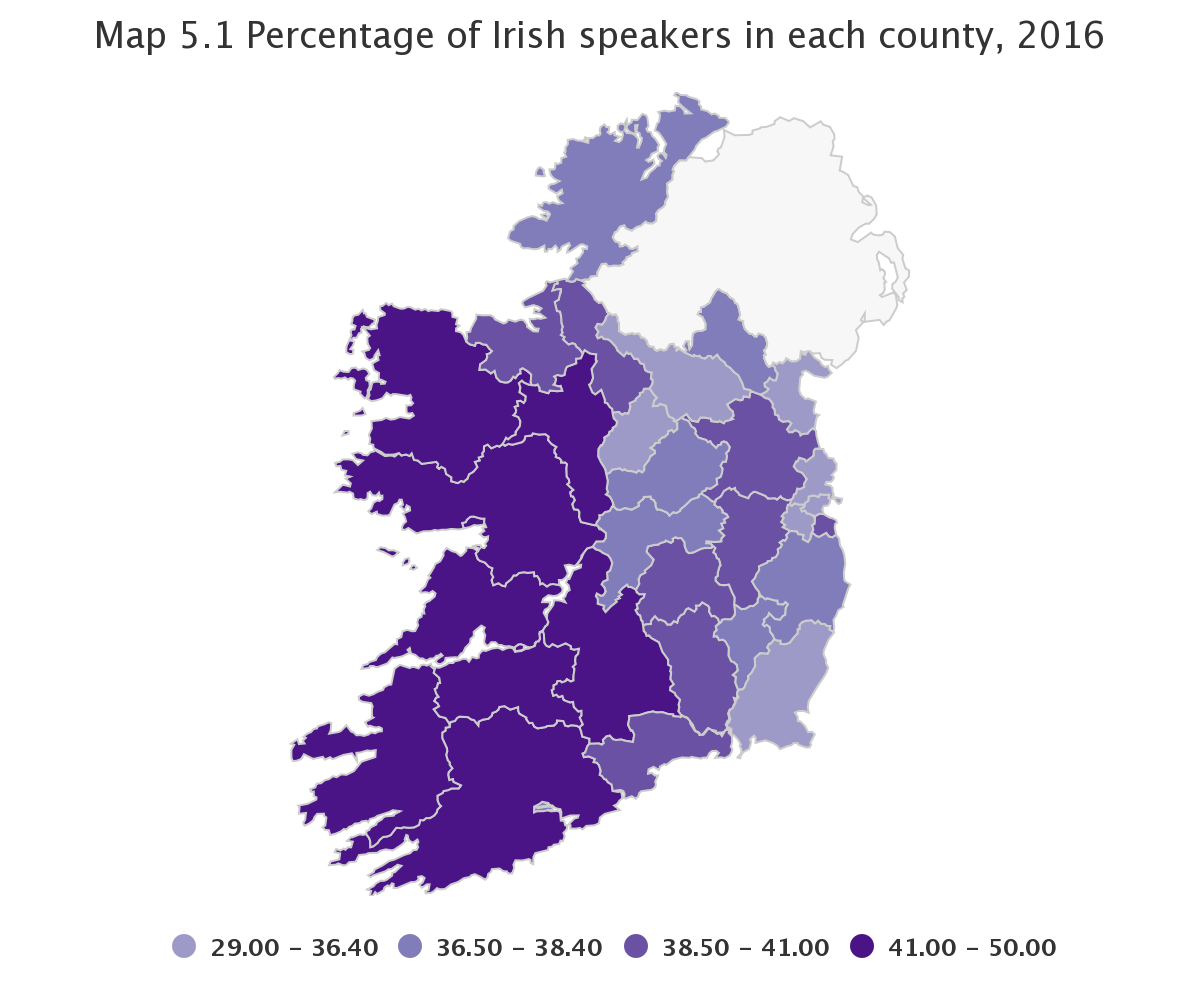


### Downloading information and calculating distribution by classification variables

As explained above, tables regarding general Irish population distribution were downloaded with information for the classification variables (sex, age, maximum education level finished and geographic location).

Since source data displayed frequencies, a simple percentual calculation was performed to obtain the relative weight of the categories within each variable.

In [80]:
#Calculating percentage of total population by location
pop_dist=pd.read_csv('data/totalpopbytownandcity.csv')
pop_dist['percent']=pop_dist['2016']/sum(pop_dist['2016'])
print('\033[1m' +'Irish Population Distribution by location'+'\033[0m')
print(pop_dist)


#Calcultaing percentage of total population by age
age_dist=pd.read_csv('data/totalpopbyagegroup.csv')
age_dist['percent']=age_dist['2016']/sum(age_dist['2016'])
print('\033[1m' +'Irish Population Distribution by age'+'\033[0m')
print(age_dist)

sex_dist=pd.read_csv('data/totalpopbysex.csv')
sex_dist['percent']=sex_dist['2016']/sum(sex_dist['2016'])
print('\033[1m' +'Irish Population Distribution by sex'+'\033[0m')
print(sex_dist)

Irish Population Distribution by location
                   population    2016   percent
0                      Carlow   56932  0.011956
1                 Dublin City  554554  0.116457
2      Dun Laoghaire-Rathdown  218018  0.045784
3                      Fingal  296020  0.062165
4                South Dublin  278767  0.058542
5                     Kildare  222504  0.046726
6                    Kilkenny   99232  0.020839
7                       Laois   84697  0.017787
8                    Longford   40873  0.008583
9                       Louth  128884  0.027066
10                      Meath  195044  0.040960
11                     Offaly   77961  0.016372
12                  Westmeath   88770  0.018642
13                    Wexford  149722  0.031442
14                    Wicklow  142425  0.029909
15                      Clare  118817  0.024952
16                  Cork City  125657  0.026388
17                Cork County  417211  0.087615
18                      Kerry  147707  0.03101

Unfortunately, information reagrding general population by finished studies could not be found. Therefore, this dimension will be randomly assigned. However, as shown below, some corrections need to be implemented to avoid inconsistencies, such as the below *Galway savant* example spotted in the first tests:

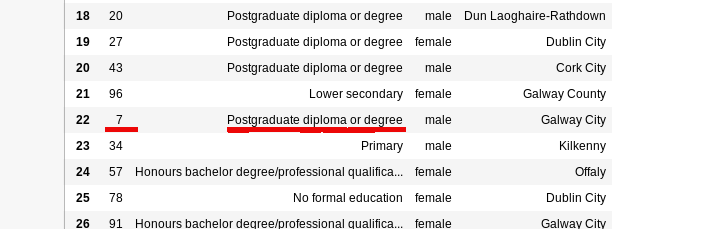

### Generating categories

With this information, we can now construct our data set and assign weights to variables according to the general population distribution, with the exception of the *studies* varaible, which will be randomly assigned.

Firstly, lists are created for three of our classification variables (excluding *age*, since it will be randomly generated and the recoded into five groups, as per CSO data. Additionally, a fifth variable will be introduced, being a dichotomical variable for the variable "Irish speaker".

According to the information extratcted form the Census, general population presents a distribution of Irish-speakers of 39.80%. This information will be used to weight the random distribution.

At this point, four variables are **categorical** and only *age* is **discrete**. As stated above, this will be transformed into a **range** variable.

In [81]:
import pandas as pd
import numpy as np

#Categories as per CSO 2016 census
education=['No formal education', 'Primary', 'Lower secondary', 'Upper secondary','Technical/vocational','Advanced certificate/completed apprenticeship','Higher certificate','Ordinary bachelor degree/professional qualification or both','Honours bachelor degree/professional qualification or both','Postgraduate diploma or degree','Doctorate (Ph.D.)']
sex=['male','female']
place=['Carlow','Dublin City','Dun Laoghaire-Rathdown','Fingal','South Dublin','Kildare','Kilkenny','Laois','Longford','Louth','Meath','Offaly','Westmeath','Wexford','Wicklow','Clare','Cork City','Cork County','Kerry','Limerick City and County','Tipperary','Waterford City and County','Galway City','Galway County','Leitrim','Mayo','Roscommon','Sligo','Cavan','Donegal','Monaghan']
irish=['Irish Speaker','Non-Speaker']


### Synthetising data

This data set will comprise 200 records and will independently follow general Irish population distribution for each classification variable.

The method to generate random information is a random choice for those variables with generated lists of categories and a random integer generation for *age*.

When generating the data set, weights have been included, as per information obtained with real-world information from Census.

In [ ]:
#Generating synthetic data set
data = {
'age': np.random.randint(1,99,200), 
'education' : np.random.choice(education,200),
'sex': np.random.choice(sex, 200, p=(0.494434,0.505566)),
# weighting geographic location by its probability,as per pop_dist calculated
'place':np.random.choice(place, 200,p=(0.0119558198310956, 0.116457312418559, 0.0457841622977552,0.0621647190754043,0.0585415588220162,0.0467262301640219,0.0208388940047649,0.0177865185174296,0.00858340167140396,0.0270658659999811,0.0409595820125098,0.016371946705755,0.0186418556594948,0.0314418825397192,0.0299094997443229,0.0249517783473492,0.0263881903413893,0.0876150415855972,0.0310187290063872,0.0409291317582502,0.0335064097785216,0.024397163716317,0.0165204179454898,0.0376722145629916,0.00672929618962318,0.0274066988459354,0.013554353178849,0.0137624649165821,0.0159970935757314,0.0334305991455029,0.0128911676412498)),
'IrishSpeaker':np.random.choice(irish,200,p=(0.398,0.602))    
}

### Recoding and correcting inconsistencies

As explained before, age is to be recoded, transforming it from a discrete variable into a interval one.

Also, in the absence of education level for the general population, we are using some common sense to avoid assigning high education levels to people with short ages. This is made quite arbitrarily, but trying to avoid inconsistent data, as the previously mentioned 'Galway Savant'.

*Age* variable will be appended to the data set, instead of overwritting it for testing purposes (to ensure that variables have been correctly recoded into their groups) and for possible future developments of the model, for which a discrete numerical variable could be useful.

On the other hand, regarding *education* variable, records will be overwritten according to some simple rules, restricting the available categories for population under 14 years old to Primary and for population under 19 years to their potentially attainable education levels.

In this case, the overwritting method used was the row iteration, for which this [Stack Overflow](https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row) entry resulted quite clarifying.

In [ ]:
# RECODE AGE by groups
data['ages grouped'] = pd.cut(data['age'], [0,14,24,44,64,100])

df = pd.DataFrame(data)

# Correcting 'Effect Savant', matching ages with education levels

for i, row in df.iterrows():
    ifor_val=np.random.choice(education)
    if row['age']<=14:
        ifor_val='Primary'
    elif row['age']<=19:
        ifor_val=np.random.choice(['Primary','Lower secondary','Upper secondary','Technical/vocational','Advanced certificate/completed apprenticeship','Higher certificate','Ordinary bachelor degree/professional qualification or both'])
    else:
        ifor_val=ifor_val
    df.at[i,'education']=ifor_val



Finally, with all this information inserted, a synthetised data set for Irish population classified by age, sex, location, education level, group of age and ability to speak Irish was created.

In [82]:
df

,age,education,sex,place,IrishSpeaker,ages grouped
0,17,Advanced certificate/completed apprenticeship,male,Tipperary,Non-Speaker,"(14, 24]"
1,64,Advanced certificate/completed apprenticeship,male,Galway County,Irish Speaker,"(44, 64]"
2,57,Upper secondary,male,Waterford City and County,Non-Speaker,"(44, 64]"
3,87,Lower secondary,male,Kerry,Non-Speaker,"(64, 100]"
4,31,Advanced certificate/completed apprenticeship,female,Tipperary,Irish Speaker,"(24, 44]"
5,32,No formal education,male,Meath,Non-Speaker,"(24, 44]"
6,91,Lower secondary,female,Galway County,Irish Speaker,"(64, 100]"
7,35,Primary,male,Offaly,Irish Speaker,"(24, 44]"
8,68,Primary,male,Wexford,Non-Speaker,"(64, 100]"
9,54,No formal education,female,Clare,Non-Speaker,"(44, 64]"


## Further Development.

Due to some obstacles found during this research, this synthetic data set results quite basic in its conception, although it reunites the basic characteristics and fulfils the main objective of creating random variables that adjust to a previously studied distribution.

However, from this point, some features seem likely to be developed in order to improve this task which would make this synthetic model more accurate and interesting from the analytical point of view. 

Mainly, the development of a Bayesian model, as discussed in the [Fundamentals of Data Analysis Module](https://web.microsoftstream.com/video/c4b9c4f6-88d6-444e-b3bd-f158522d5fb1) would fit with this information.

$$ P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$$


Additionally, a more in-depth analysis of the correlations and covariances in the model could lead to interesting multivariate analysis and predictive models but, as stated in the summary, this investigation would require a different approach and further data manipulation.